In [1]:
from scipy.sparse import csr_matrix
from scipy.sparse.csgraph import shortest_path
import scipy.io
import numpy as np

# shortest path

In [2]:
def getFileNameP(dataset, prefix, method):
    if method != "prefix":
        return "Ps/%s-%s-P-0" %(dataset, method)
    return "Ps/%s-%s-P-%s-0" %(dataset, method, prefix)
def getCSR(dataset, prefix ,method, conflag=False):
    file = "outputs/" + getFileNameP(dataset, prefix, method)
    f1 = open(file)  
    data1 = f1.read().split("\n")
    
    row = []
    col =  []
    data =  []
    
    for dp in data1:
        dps = dp.split()
        if(len(dps)>0):
            i = int(dps[0])-1
            j = int(dps[1]) -1   
            k = float(dps[2])  
            if(k != 0):
                if conflag:
                    k=1
                row.append(i)
                col.append(j)
                data.append(k)
                row.append(j)
                col.append(i)
                data.append(k)
        else:
            print(dps)
    n = max(row)+1
    X = csr_matrix((data, (row, col)), shape=(n, n))
    return X


def getCSRDistance(dataset, prefix ,method, conflag=False):
    file = "outputs/" + getFileNameP(dataset, prefix, method)
    f1 = open(file)  
    mat = scipy.io.loadmat('datasets/iris-D-city.mat')['D']
    data1 = f1.read().split("\n")
    
    row = []
    col =  []
    data =  []
    
    for dp in data1:
        dps = dp.split()
        if(len(dps)>0):
            i = int(dps[0])-1
            j = int(dps[1]) -1   
#             k = float(dps[2])  
            k = mat[i,j]
            if(k != 0):
                if conflag:
                    k=1
                row.append(i)
                col.append(j)
                data.append(k)
                row.append(j)
                col.append(i)
                data.append(k)
        else:
            print(dps)
    n = max(row)+1
    X = csr_matrix((data, (row, col)), shape=(n, n))
    return X

In [3]:
file = "outputs/" + getFileNameP("iris-R-city", "" ,"exact")
f1 = open(file)  
data1 = f1.read().split("\n")
mat = scipy.io.loadmat('datasets/iris-D-city.mat')['D']
# mat2 = np.genfromtxt('datasets/iris-D-city')

In [12]:
g = getCSRDistance("iris-R-city", "" ,"exact", conflag=False)
dist_matrix, predecessors = shortest_path(csgraph=g, directed=False, indices=1, return_predecessors=True)

[]


## pmfg

In [27]:
mat = scipy.io.loadmat('debug/iris-pmfg-P-0.mat')
my_pmfg = np.genfromtxt("./outputs/Ps/irisRand-pmfg-P-0", delimiter = " ")

In [35]:
us[orders][-3:]

array([ 10, 102, 143], dtype=uint8)

In [36]:
vs[orders][-3:]

array([ 38, 143, 102], dtype=uint8)

In [41]:
us = mat["r"].flatten()
vs = mat["c"].flatten()
vals = mat["val"].flatten()
orders = np.argsort(vals)
j = 0
for k in range(len(orders)//2):
    i = len(orders)-2*k-1
    u = us[orders[i]]
    v = vs[orders[i]]
    if u > v:
        u,v=v,u
    if(u!= my_pmfg[j][0] or v!= my_pmfg[j][1]):
        print(u,v,i)
        print(my_pmfg[j][0], my_pmfg[j][1],j)
        break
    j=j+1

In [44]:
np.sum(vals), np.sum(my_pmfg[:,2]*2)

(776.3672775461218, 776.36729)

## create distance without tie

In [159]:
rng = np.random.default_rng(0)
D = scipy.io.loadmat('datasets/iris-D-city.mat')['D']

In [160]:
D

array([[0. , 0.7, 0.8, ..., 7.5, 7.3, 6.6],
       [0.7, 0. , 0.5, ..., 7.2, 7.8, 6.3],
       [0.8, 0.5, 0. , ..., 7.7, 7.9, 6.8],
       ...,
       [7.5, 7.2, 7.7, ..., 0. , 1.2, 0.9],
       [7.3, 7.8, 7.9, ..., 1.2, 0. , 1.5],
       [6.6, 6.3, 6.8, ..., 0.9, 1.5, 0. ]])

In [166]:
Drand = D + rng.random((150,150))/100
np.fill_diagonal(Drand, 0)
Drand = (Drand + Drand.T)/2
S = 1./(1+Drand/(np.mean(abs(Drand))))
np.savetxt("datasets/irisRand-D" , Drand, delimiter = ' ')
np.savetxt("datasets/irisRand-R" , S, delimiter = ' ')
scipy.io.savemat("datasets/irisRand.mat" ,{"D":Drand, "S":S})
# Z = scipy.cluster.hierarchy.linkage(scipy.spatial.distance.squareform(Drand) , method = "complete")
# f, ax = plt.subplots(figsize=(20, 5))
# dendrogram(Z);
# print(sum(Z[:,2]))


In [162]:
Drand

array([[0.        , 0.70139871, 0.80468887, ..., 7.50608965, 7.30296635,
        6.60496695],
       [0.70139871, 0.        , 0.50330975, ..., 7.20918691, 7.80729707,
        6.30683625],
       [0.80468887, 0.50330975, 0.        , ..., 7.70311197, 7.9059134 ,
        6.80418158],
       ...,
       [7.50608965, 7.20918691, 7.70311197, ..., 0.        , 1.20338224,
        0.90674179],
       [7.30296635, 7.80729707, 7.9059134 , ..., 1.20338224, 0.        ,
        1.50548828],
       [6.60496695, 6.30683625, 6.80418158, ..., 0.90674179, 1.50548828,
        0.        ]])

In [208]:
D[89,117]

7.1000000000000005

In [186]:
len(np.unique(Drand))

11176

In [189]:
150 * 149/2 + 1

11176.0

## compare TMFG

difference due to tie-breaking

In [178]:
c1=np.genfromtxt("./debug/matlab-tmfg")
c2=np.genfromtxt("./debug/irisRand-exact-peo-0")

In [179]:
for i in range(len(c1)):
    if(c1[i]!= c2[i]):
        print(i, c1[i], c2[i])

## compare outputs

In [23]:
from sklearn.metrics.cluster import adjusted_rand_score

In [235]:
c1=np.genfromtxt("./debug/flat")
c2=np.genfromtxt("./outputs/dbht/iris-Rand-exact-T-17")
print(c1)
print(c2)
adjusted_rand_score(c1, c2)

[105. 121. 121. 121. 103. 114. 121. 103. 121. 121. 114. 103. 121. 121.
 114. 114. 114. 105. 114. 114. 105. 114. 121. 103. 121. 121. 103. 105.
 105. 121. 121. 105. 114. 114. 121. 103. 105. 121. 121. 103. 105. 121.
 121. 103. 114. 121. 114. 121. 114. 103.  13.  13.  13.  27.  13.  27.
  13.  91.  13.  27.  91.  27.  27.   5.  27.  13.  27.  27.  10.  42.
   3.   8.  20.   5.  10.  13.  13.  13.   5.  42.  42.  42.  27.  20.
  27.   5.  13.  10.  27.  42.  27.   5.  27.  91.  27.  27.  27.   8.
  91.  27.  69.  20.  69.  58.  58.  86.  27.  86.  58.  69.  58.  58.
  66.  20.  20.  66.  58.  86.  86.  20.  69.  20.  86.  20.  69.  69.
   3.   3.  58.  69.  86.  86.  58.  20.  20.  86.  69.  58.   3.  66.
  69.  66.  20.  69.  69.  66.  20.  58.  69.   3.]
[11. 13. 13. 13. 10. 14. 13. 10. 13. 13. 14. 10. 13. 13. 14. 14. 14. 11.
 14. 14. 11. 14. 13. 10. 13. 13. 10. 11. 11. 13. 13. 11. 14. 14. 13. 10.
 11. 13. 13. 10. 11. 13. 13. 10. 14. 13. 14. 13. 14. 10.  6.  6.  6.  1.
  6.  1.  6.  8.  6

1.0

In [237]:
np.where(c1==5), np.where(c1==8)

((array([63, 73, 78, 85, 91]),), (array([71, 97]),))

In [205]:
c1[69], c1[89], c1[107], c1[130]

(42.0, 42.0, 86.0, 86.0)

In [204]:
c2[69], c2[89], c2[107], c2[130]

(array([58., 58., 58.]), 5.0, 5.0, 17.0, 17.0)

In [210]:
c1=np.genfromtxt("./debug/bb")
c2=np.genfromtxt("./debug/matlab-bbMem")
adjusted_rand_score(c1, c2)

1.0

In [192]:
c1

array([108., 129., 121., 124., 107., 145., 143., 102., 146., 125., 144.,
       116., 129., 137., 144., 145., 144., 108., 145., 136., 134., 139.,
       143.,  99., 132., 130.,  99., 135., 133., 118., 118., 134., 142.,
       142., 130., 112., 135., 130., 146., 101., 108., 146., 122.,  99.,
       136., 129., 138., 131., 113., 112.,  17.,  23.,  17.,  35.,  15.,
        96.,  23.,  97.,  13.,  51.,  91.,  40.,  53.,   7.,  49.,  12.,
        41.,  53.,  81.,  38.,   4.,  25.,  20.,   7.,  54.,  11.,  16.,
        48.,  52.,  89.,  89.,  89.,  53.,  87.,  41.,  52.,  48.,  81.,
        49.,  38.,  96.,   1.,  53.,  97.,  96.,  30.,  28.,  22.,  97.,
        26.,  76.,  45.,  78.,  88.,  62.,  94.,  96.,  84.,  88.,  93.,
        56.,  55.,  64.,  46.,  47.,  72.,  63.,  95.,  94.,  87.,  93.,
        46.,  94.,  19.,  74.,  79.,   6.,   6.,  61.,  79.,  84.,  95.,
        62.,  82.,  87.,  85.,  76.,  59.,   3.,  67.,  74.,  66.,  45.,
        93.,  75.,  72.,  19.,  57.,  76.,   4.])

In [193]:
c2

array([ 87., 127.,  99.,  94.,  72., 128., 115.,  65., 122., 100., 129.,
        83., 127., 124., 129., 128., 129.,  87., 128., 117.,  89., 108.,
       115.,  57.,  83., 119.,  57.,  95.,  85.,  84.,  84.,  89., 125.,
       125., 119.,  78.,  95., 119., 122.,  85.,  87., 122., 105.,  57.,
       117., 127., 118., 106.,  96.,  78.,  50.,  44.,  50.,  20.,  40.,
        14.,  44.,  53.,  37.,  21.,  46.,   6.,  19.,  23.,   3.,  32.,
        11.,  19.,  35.,  30.,  48.,   7.,  56.,  23.,  31.,  28.,  45.,
        49.,  36.,  39.,  39.,  39.,  19.,  63.,  11.,  36.,  49.,  35.,
         3.,  20.,  14.,  29.,  19.,  53.,  14.,   2.,   5.,  16.,  53.,
         4., 140.,  66., 135., 103., 110., 146.,  14., 141., 103., 136.,
        76.,  71.,  98.,  70.,  75., 112.,  92., 147., 146.,  63., 136.,
        70., 146.,  54., 137., 138.,  47.,  47., 102., 138., 142., 147.,
       110.,  61.,  63., 144., 140.,  91.,  43., 120., 137., 111.,  66.,
       136., 139., 112.,  54.,  80., 140.,  48.])

In [201]:
c1[69], c1[89], c1[107], c1[130]

(38.0, 38.0, 84.0, 84.0)

In [199]:
c2[69], c2[89], c2[107], c2[130]

(30.0, 20.0, 71.0, 76.0)

In [196]:
d = dict()
for i in range(len(c1)):
    if(c1[i] not in d):
        d[c1[i]] = c2[i]
    elif(d[c1[i]] != c2[i]):
        print(i, int(c1[i]), int(d[c1[i]]), int(c2[i]))

89 38 30 20
130 84 141 142


In [198]:
np.where(c1==38)

(array([69, 89]),)

In [206]:
# d

### check denro

In [96]:
from scipy.cluster.hierarchy import dendrogram

In [98]:
# https://github.com/scipy/scipy/blob/e4b3e6eb372b8c1d875f2adf607630a31e2a609c/scipy/cluster/hierarchy.py#L2286
def _check_hierarchy_uses_cluster_before_formed(Z):
    n = Z.shape[0] + 1
    for i in range(0, n - 1):
        if Z[i, 0] >= n + i or Z[i, 1] >= n + i:
            print(i)
            return True
    return False

In [248]:
Z = np.genfromtxt("debug/dendro2")
Z2 = np.genfromtxt("debug/matlabZ")

In [249]:
Z[-17:,2]

array([ 1.,  2.,  2.,  2.,  2.,  2.,  4.,  3.,  5.,  3.,  6.,  4.,  4.,
        8.,  5., 12., 17.])

In [250]:
len(Z), sum(Z[:,2]), sum(Z2[:,2])

(149, 123.45843215092444, 123.45843209700001)

In [251]:
_check_hierarchy_uses_cluster_before_formed(Z)

False

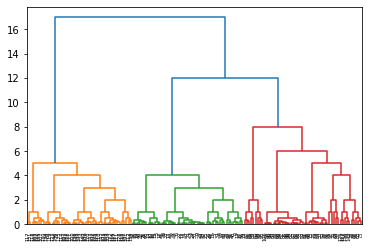

In [252]:
dendrogram(Z);